## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#So we need query the rows have the treatment group with old_page 
#or the control group with the new_page
df_neo = df.query('group == "treatment" and landing_page == "old_page" or group == "control" and landing_page == "new_page"  ')
df_neo.shape[0]


3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

no missing value



`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
p_old = df.query('group == "treatment" & landing_page == "old_page" ')
p_neo = df.query('group == "control" & landing_page == "new_page" ')
p = p_neo.append(p_old).index
p

Int64Index([    22,    240,    490,    846,    850,    988,   1198,   1354,
              1474,   1877,
            ...
            293240, 293302, 293391, 293443, 293530, 293773, 293817, 293917,
            294014, 294252],
           dtype='int64', length=3893)

In [9]:
#Store new dataframe in df2
df2=df.drop(p)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'])]['user_id']


2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(['user_id'], keep = False)]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#drop one of the duplicated user_id rows from the datafra
df2 = df2.drop_duplicates(['user_id'])
#check the number of rows for the duplicated user_id 
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
probability_group_control = df2[df2['group'] == "control"]['converted'].mean()
probability_group_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
probability_group_treatment = df2[df2['group'] == "treatment"]['converted'].mean()
probability_group_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
probability_landing_page_new_page = (df2['landing_page']=="new_page").mean()
probability_landing_page_new_page

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**1.the convertion rate in the control group is higher than the conversion rate in the treatment group, but with very tiny diffrence.**

**2.We can't decide the old page leads more conversions because of this tiny diffrence, so these two pages have similar performance.**

**3.the probability of an indivisual recieved the new page is .5 which means that the diffrence in the conversion rate is between the same amount of traffic for each group .**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$ : $p_{new}$ <= $p_{old}$



$H_{1}$ : $p_{new}$ > $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
Pnew = len(df2.query('converted == 1'))/len(df2.index)
Pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
Pold = len(df2.query('converted == 1'))/len(df2.index)
Pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
N_new = len(df2.query('landing_page == "new_page"'))
N_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
N_old = len(df2.query('landing_page == "old_page"'))
N_old


145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted  = np.random.choice([1,0],size =N_new ,p=[Pnew,(1-Pnew)]).mean()
new_page_converted

0.11957883146376712

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted  = np.random.choice([1,0],size =N_old ,p=[Pold,(1-Pold)]).mean()
old_page_converted

0.11952586147555654

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
diff = new_page_converted - old_page_converted 
diff


5.2969988210582741e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [47]:
p_diffs = []
new_converted_simulation = np.random.binomial(N_new, Pnew, 10000)/N_new
old_converted_simulation = np.random.binomial(N_old, Pold, 10000)/N_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0,0.5,'frequancy')

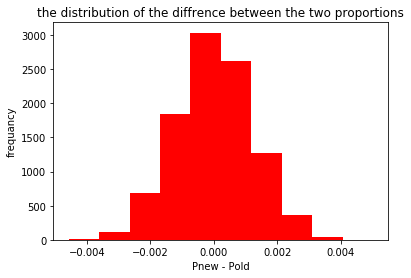

In [48]:
plt.hist(p_diffs)
plt.hist(p_diffs, color = "red")
plt.title('the distribution of the diffrence between the two proportions')
plt.xlabel('Pnew - Pold')
plt.ylabel('frequancy')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [49]:
new_page_converted = df2.query('landing_page == "new_page"')
old_page_converted = df2.query('landing_page == "old_page"')
print(new_page_converted.converted.mean())
print(old_page_converted.converted.mean())
#observed difference
Obs_diff = new_page_converted.converted.mean() -old_page_converted.converted.mean()
Obs_diff

0.118808065515
0.1203863045


-0.0015782389853555567

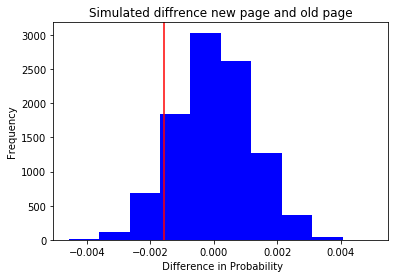

In [50]:
plt.hist(p_diffs, color = "blue")
plt.title("Simulated diffrence new page and old page")
plt.xlabel(' Difference in Probability')
plt.ylabel('Frequency');
plt.axvline(x=Obs_diff,color='r')

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

1-obs_diff represents the difference between converted rates of new page and old page, based on our dataset. 
2-p_diffs represents the simulated difference between converted rates of new page and old page, based on 10,000 simulated samples. 
3-The old pages batter than the new pages 
4-89.3% is the proportion of the p_diffs that are greater than the actual difference observed in ab_data.csv. In scientific studies this value is also called p-value. This value means that we cannot reject the null hypothesis

l.**We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let n_old and n_new refer the the number of rows associated with the old page and new pages, respectively..**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [51]:
import statsmodels.api as sm

convert_old = len(df2.query('converted==1 and landing_page=="old_page"')) #rows converted with old_page
convert_new = len(df2.query('converted==1 and landing_page=="new_page"')) #rows converted with new_page
N_old = len(df2.query('landing_page == "old_page"'))
N_new = len(df2.query('landing_page == "new_page"'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [52]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [N_old, N_new],alternative = 'smaller')


In [53]:
z_score,p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**z-score is 1.3350383297192379 p-value is 0.90906809911126674 A negative z-score suggests and the value of p-value suggests that we should we accepet the null hypothesis Therefore the conclusion is same as part j that we accept null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**we will use logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [65]:
import statsmodels.api as sm
#define the intercept column in the data frame
df2['intercept'] = 1
# create a dummy variable
df2['ab_page'] = pd.get_dummies(df['landing_page'])['new_page']
df2.tail()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [66]:
#create the logistic regression model
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results_1 = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [68]:
results_1.summary2()



<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-20 01:45 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [69]:
np.exp(results_1.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

the interpreting of this model is if the indivisual uses the new page, it is .985 times more likely to make a conversion than if he uses the old page. which means that there is a very tiny diffrence in the performance between the both pages, with more a little bit in the old page.



e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**p-value associated with ab_page column is 0.19 which is lower than the p-value calculated using the z-score function. The reason why is different is due to the intercept added.**

$$H_0: p_{new} - p_{old} = 0$$$$H_1: p_{new} - p_{old} != 0$$

Hypothesis in Part II ::

$H_{0}$ : $p_{new}$ <= $p_{old}$

$H_{1}$ : $p_{new}$ > $p_{old}$



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In general,when the customer arrived to the landing page, he was interested in the website's products, but may be there are other factors that influence whether he converted or not like the way of paying is suitable for him or not,the product was like what he wants or not, or the price was suitable for him or not. anyway, there are other factors that related to the customer himself, like the age, the range of his salary, or the time of opening the website.

It is a good idea to take these factors(age,salary,time) into our regression model, to know which of them is the most influenced in the conversion rate, but adding addtional terms to our regression model has disadvantages like Multicollinearity(that these factors may be correlated to one another) and if the linear relationship exists or not.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [73]:
#read a csv file 
df3 = pd.read_csv("countries.csv")
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [74]:
#knowing the unique values in the country columns
df3.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [75]:
#join the country data frame with the converted rate data frame
df_joined = df2.join(df3.set_index('user_id'),on ='user_id')

In [76]:
#create dummy variables for the country column
df_joined[['CA','UK','US']] = pd.get_dummies(df_joined['country'])

In [78]:
#create a logistic reggresion model for the converted
#column with the country dummy variables columns
df_joined['intercept'] = 1
logit_mod = sm.Logit(df_joined['converted'],df_joined[['intercept','UK','CA']])
results_2 = logit_mod.fit()
results_2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-20 01:47 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
==================================================================

"""

In [79]:
np.exp(results_2.params)

intercept    0.135779
UK           1.009966
CA           0.960018
dtype: float64

In [80]:
1/np.exp(results_2.params)

intercept    7.364925
UK           0.990133
CA           1.041647
dtype: float64

Interpretation of the previous logistic model

1.If an individual is from US, it is 0.9901 times more likely to make a conversion than if he is from UK , holding all other variables constant.

2.If an indivisual is from US , it is 1.04 more likely to make a conversion than if he is from CA, holding all other variables constant.

from these values which is very close to 1 time, we can notice that there is no influence on the conversion rate comes from the country variable.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [81]:
#showing the columns names
df_joined.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted',
       'intercept', 'ab_page', 'country', 'CA', 'UK', 'US'],
      dtype='object')

In [82]:

#create a logistic regression model for the ab_page and the dummy variables of country 
logit_mod = sm.Logit(df_joined['converted'],df_joined[['intercept','ab_page','UK','CA']])
results_3 = logit_mod.fit()
results_3.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-20 01:49 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
==================================================================

"""

In [83]:
np.exp(results_3.params)

intercept    0.136795
ab_page      0.985168
UK           1.009932
CA           0.960062
dtype: float64

We can interpret the result like this:

1. if an indivisual uses the new page, it is .985 more likely to make a conversion than if he uses the old page, holding all other variables constant.

2. If an indivisual is from UK , it is 1,009 more likely to make a conversion than if he is from US, holding all other variables constant.

3.If an indivisual is from CA , it is 0.96 more likely to make a conversion than if he is from US, holding all other variables constant.

In [86]:
#create the interaction model between the page and country using dmatrices 

from patsy import dmatrices

# create dummy variables, and their interactions
y, X = dmatrices('converted ~ C(country)*C(landing_page)', df_joined, return_type="dataframe")
# flatten y into a 1-D array so scikit-learn can understand it
y = np.ravel(y)

#create a logistic model with X as independent variables, and y as dependent one.
logit_mod = sm.Logit(y,X)
results_4 = logit_mod.fit()
results_4.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                       Results: Logit
=============================================================================================
Model:                       Logit                     No. Iterations:            6.0000     
Dependent Variable:          y                         Pseudo R-squared:          0.000      
Date:                        2021-08-20 01:51          AIC:                       212782.6602
No. Observations:            290584                    BIC:                       212846.1381
Df Model:                    5                         Log-Likelihood:            -1.0639e+05
Df Residuals:                290578                    LL-Null:                   -1.0639e+05
Converged:                   1.0000                    Scale:                     1.0000     
---------------------------------------------------------------------------------------------
                                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------------------
Intercept                                    -2.0715   0.0371 -55.7977 0.0000 -2.1442 -1.9987
C(country)[T.UK]                              0.0901   0.0405   2.2252 0.0261  0.0107  0.1694
C(country)[T.US]                              0.0644   0.0384   1.6788 0.0932 -0.0108  0.1396
C(landing_page)[T.old_page]                   0.0674   0.0520   1.2967 0.1947 -0.0345  0.1694
C(country)[T.UK]:C(landing_page)[T.old_page] -0.0783   0.0568  -1.3783 0.1681 -0.1896  0.0330
C(country)[T.US]:C(landing_page)[T.old_page] -0.0469   0.0538  -0.8718 0.3833 -0.1523  0.0585
=============================================================================================

"""

In [87]:
np.exp(results_4.params)

Intercept                                       0.126002
C(country)[T.UK]                                1.094247
C(country)[T.US]                                1.066532
C(landing_page)[T.old_page]                     1.069775
C(country)[T.UK]:C(landing_page)[T.old_page]    0.924703
C(country)[T.US]:C(landing_page)[T.old_page]    0.954198
dtype: float64

In [88]:
1/np.exp(results_4.params)


Intercept                                       7.936353
C(country)[T.UK]                                0.913871
C(country)[T.US]                                0.937618
C(landing_page)[T.old_page]                     0.934776
C(country)[T.UK]:C(landing_page)[T.old_page]    1.081428
C(country)[T.US]:C(landing_page)[T.old_page]    1.048001
dtype: float64

interpreting the interaction model:

1.If an individual is from CA and use a new page, he is 0.913871 times more likely to make a conversion than if he is from UK and using the new page , holding all other variables constant.

2.If an individual is from CA and use a new page, he is 0.937618 times more likely to make a conversion than if he is from US and use a new page , holding all other variables constant.

3.If an individual is from CA and use a new page, he is 0.934776 times more likely to make a conversion than if he is from CA and use an old page, holding all other variables constant.

4.there is no influence in the conversion rate if an indivisual uses old page or new page, or if he is in a specific country or other country.

5.there is no diffrence in the conversion rate if an indivisual uses one of the pages and he is in a specific country.

**Conclusions:**


In this project, we showed three ways to know which page has the highest performace ,by the converted rate, they are the probability, hypothesis testing, and the regression models, all of these ways give us evidences that the performace of the old page is better than the new one but with a tiny diffrence, so we can make a decision that keep the old page and reject the new one

In [90]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0